# Key drivers of long AHT and AST

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/content/calls.csv')

In [4]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [5]:
df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [7]:
# Convert the relevant columns to datetime format
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 3.8+ MB


In [9]:
# 1. Calculate Handle Time for each call
# Formula: Handle Time = call_end_datetime - agent_assigned_datetime
df['handle_time'] = (df['call_end_datetime'] - df['agent_assigned_datetime']).dt.total_seconds()

# 2. Calculate Waiting Time for each call
# Formula: Waiting Time = agent_assigned_datetime - call_start_datetime
df['waiting_time'] = (df['agent_assigned_datetime'] - df['call_start_datetime']).dt.total_seconds()

# 3. Calculate AHT (Average Handle Time)
# Formula: AHT = Total Handle Time / Total Number of Calls
aht = df['handle_time'].sum() / len(df)
print(f"Average Handle Time (AHT): {aht:.2f} seconds")

# 4. Calculate AST (Average Speed to Answer)
# Formula: AST = Total Waiting Time / Total Number of Calls
ast = df['waiting_time'].sum() / len(df)
print(f"Average Speed to Answer (AST): {ast:.2f} seconds")

Average Handle Time (AHT): 697.05 seconds
Average Speed to Answer (AST): 437.07 seconds


In [10]:
df[['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime', 'handle_time', 'waiting_time']].head()

,call_start_datetime,agent_assigned_datetime,call_end_datetime,handle_time,waiting_time
0,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,1860.0,420.0
1,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,720.0,180.0
2,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,1140.0,480.0
3,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,420.0,300.0
4,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,540.0,600.0


In [11]:
reason_df = pd.read_csv('/content/reason.csv')

In [12]:
reason_df.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [13]:
reason_df.isnull().sum()

,0
call_id,0
primary_call_reason,0


In [14]:
reason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [15]:
reason_df['primary_call_reason'].unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight',
       'Check In', 'Other  Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'IRROPS  ', 'Digital   Support',
       'Seating  ', 'Disability', 'Unaccompanied Minor', ' Baggage',
       'Traveler  Updates', 'Communications  ', 'ETC', 'Upgrade  ',
       'Unaccompanied Minor  ', 'Voluntary Change', 'Voluntary Change  ',
       'Checkout  ', 'Mileage Plus', 'Mileage Plus  ', 'Booking  ',
       'Baggage  ', 'Post-Flight', 'Post-Flight  ', 'Schedule Change  ',
       'Baggage', 'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Support', 'Mileage  P

In [16]:
# Standardize the 'primary_call_reason' column
reason_df['primary_call_reason'] = (
    reason_df['primary_call_reason']
    .str.strip()
    .str.replace(r'\s+', '_', regex=True)
    .str.replace('&', 'And')
    .str.replace('Check-In', 'Check_In')
    .str.replace('Post-Flight', 'Post_Flight')
    .str.title()
)

print(reason_df['primary_call_reason'].unique())

['Voluntary_Cancel' 'Booking' 'Irrops' 'Upgrade' 'Seating' 'Mileage_Plus'
 'Checkout' 'Voluntary_Change' 'Post_Flight' 'Check_In' 'Other_Topics'
 'Communications' 'Schedule_Change' 'Products_And_Services'
 'Digital_Support' 'Disability' 'Unaccompanied_Minor' 'Baggage'
 'Traveler_Updates' 'Etc']


In [17]:
# Perform a left join on call_id to keep all rows from calls_df and match the call reasons
merged_df = pd.merge(df, reason_df, on='call_id', how='left')
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,waiting_time,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary_Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,Irrops
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating


In [18]:
# 1. Find the most frequent and least frequent call reasons
call_reason_counts = merged_df['primary_call_reason'].value_counts()

# Most frequent call reason
most_frequent_reason = call_reason_counts.idxmax()

# Least frequent call reason
least_frequent_reason = call_reason_counts.idxmin()

# 2. Calculate the average handle time for the most and least frequent call reasons
average_handle_time_most_frequent = merged_df[merged_df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
average_handle_time_least_frequent = merged_df[merged_df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

# 3. Calculate the percentage difference between their average handle times
percentage_difference = ((average_handle_time_most_frequent - average_handle_time_least_frequent) / average_handle_time_least_frequent) * 100

print(f"Most Frequent Call Reason: {most_frequent_reason}")
print(f"Least Frequent Call Reason: {least_frequent_reason}")
print(f"Average Handle Time for Most Frequent Reason: {average_handle_time_most_frequent:.2f} seconds")
print(f"Average Handle Time for Least Frequent Reason: {average_handle_time_least_frequent:.2f} seconds")
print(f"Percentage Difference in Handle Time: {percentage_difference:.2f}%")

Most Frequent Call Reason: Irrops
Least Frequent Call Reason: Unaccompanied_Minor
Average Handle Time for Most Frequent Reason: 785.12 seconds
Average Handle Time for Least Frequent Reason: 519.23 seconds
Percentage Difference in Handle Time: 51.21%


In [19]:
# Group by 'primary_call_reason' and calculate the mean handle_time for each reason
average_handle_time_by_reason = merged_df.groupby('primary_call_reason')['handle_time'].mean().reset_index()

average_handle_time_by_reason.columns = ['primary_call_reason', 'average_handle_time']

# Drop duplicates if any
average_handle_time_by_reason = average_handle_time_by_reason.drop_duplicates()
print(average_handle_time_by_reason)

      primary_call_reason  average_handle_time
0                 Baggage           333.644068
1                 Booking           427.736064
2                Check_In           574.128151
3                Checkout          1016.853814
4          Communications           826.718750
5         Digital_Support           372.293878
6              Disability           292.109181
7                     Etc           962.899160
8                  Irrops           785.116069
9            Mileage_Plus           995.573406
10           Other_Topics           350.097800
11            Post_Flight           932.896074
12  Products_And_Services           746.560624
13        Schedule_Change           490.013680
14                Seating           474.994501
15       Traveler_Updates           393.233725
16    Unaccompanied_Minor           519.230769
17                Upgrade           632.344777
18       Voluntary_Cancel           721.866833
19       Voluntary_Change           639.153761


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


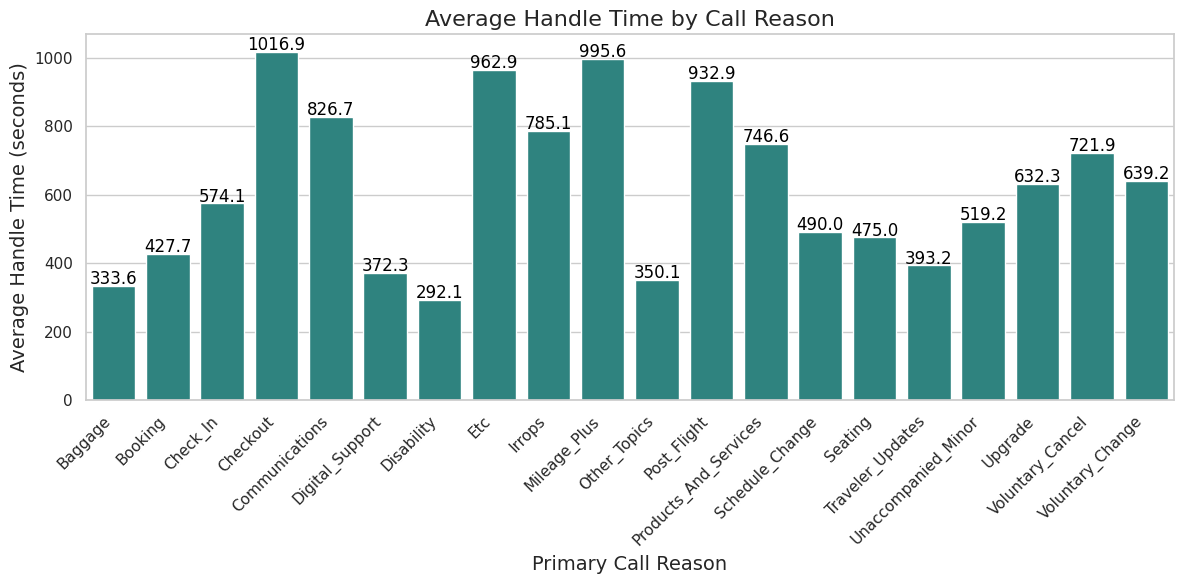

In [20]:
sns.set(style="whitegrid")

average_handle_time_by_reason['dummy'] = 1

# Create a bar plot for average handle time by call reason
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=average_handle_time_by_reason,
                       x='primary_call_reason',
                       y='average_handle_time',
                       hue='dummy',
                       palette='viridis',
                       legend=False)

plt.title('Average Handle Time by Call Reason', fontsize=16)
plt.xlabel('Primary Call Reason', fontsize=14)
plt.ylabel('Average Handle Time (seconds)', fontsize=14)

plt.xticks(rotation=45, ha='right')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.show()

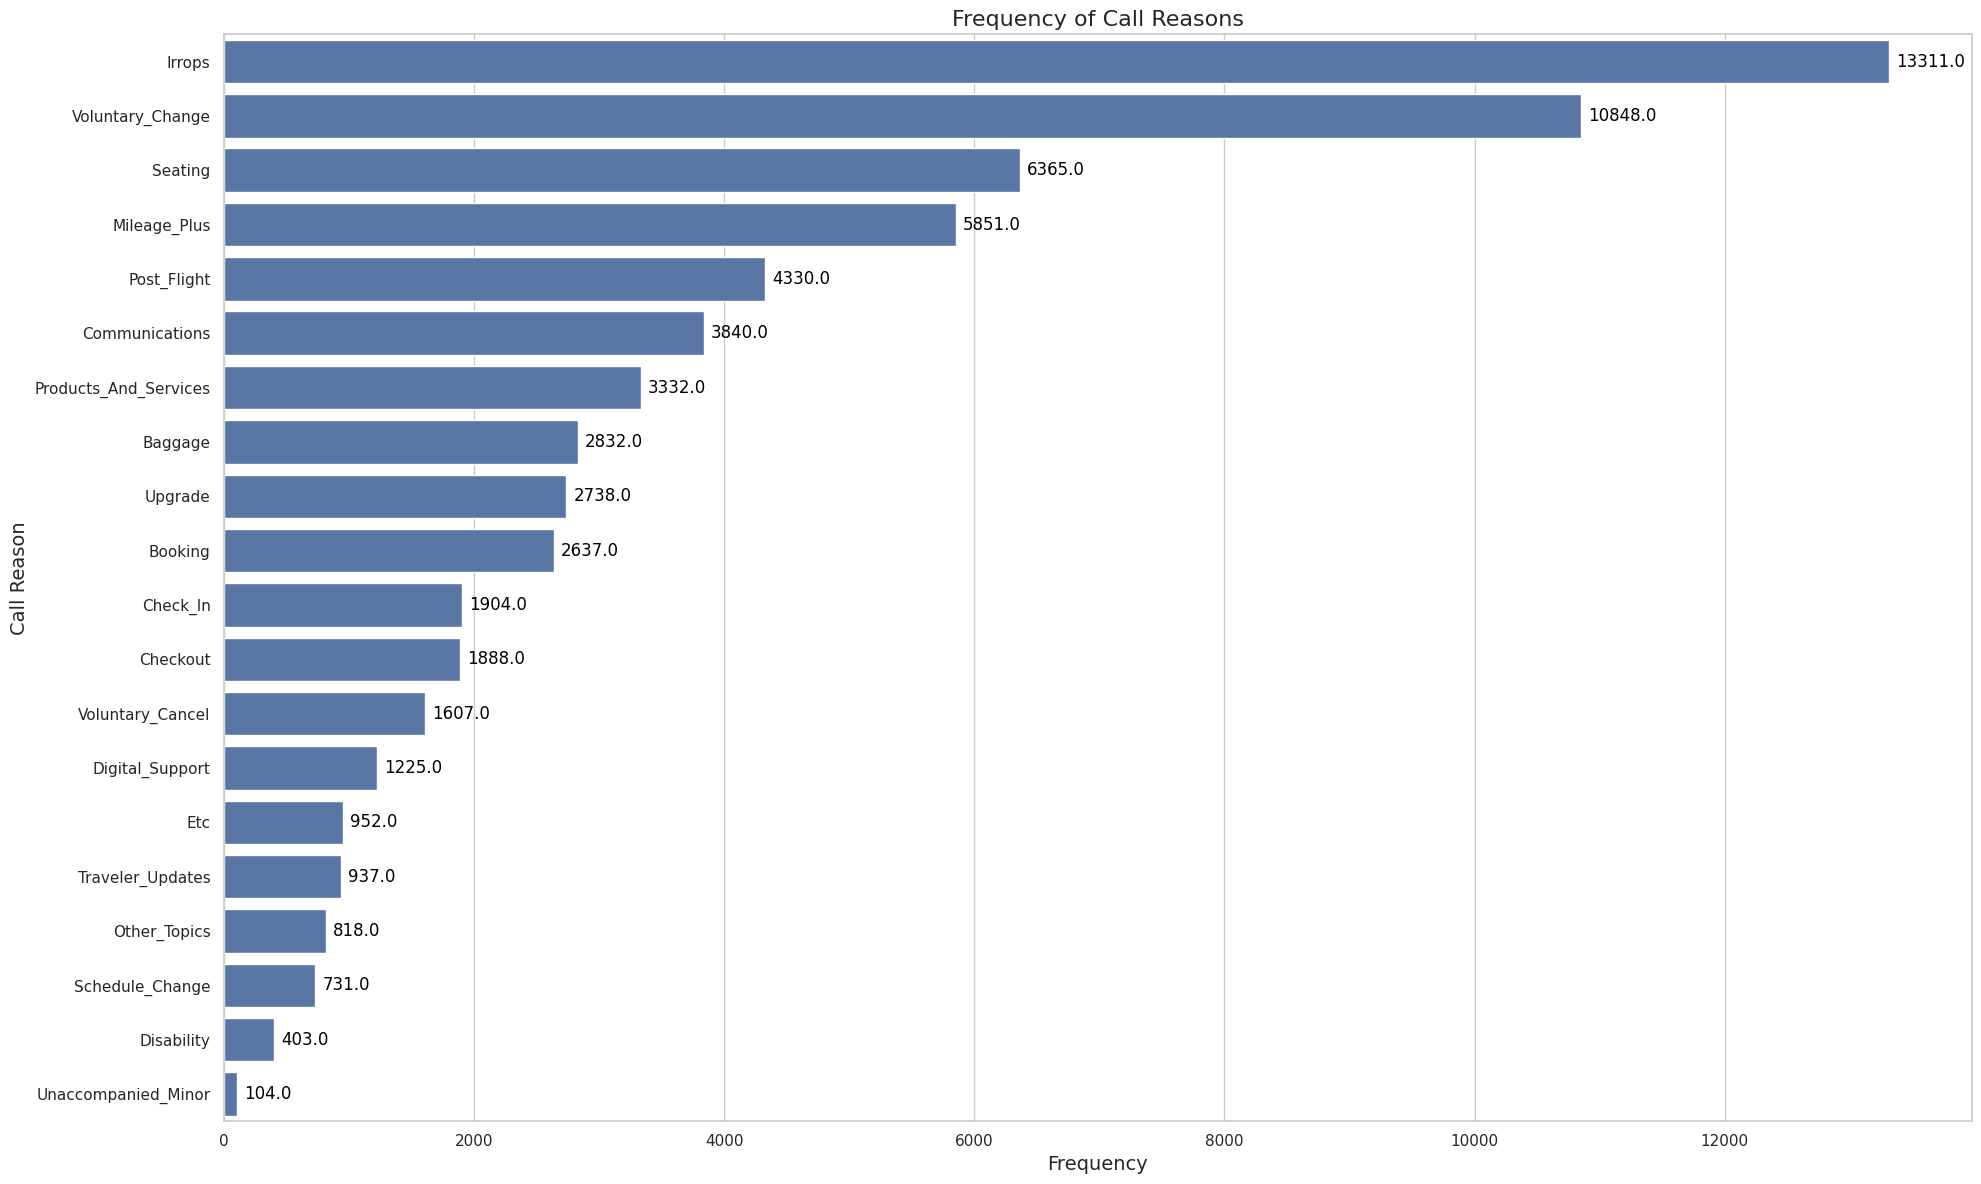

In [21]:
call_reason_counts_df = call_reason_counts.reset_index()
call_reason_counts_df.columns = ['primary_call_reason', 'frequency']

sns.set(style="whitegrid")

# Create a horizontal bar plot for call reasons vs. frequency
plt.figure(figsize=(20, 12))
h_bar_plot = sns.barplot(data=call_reason_counts_df,
                         y='primary_call_reason',
                         x='frequency')

plt.title('Frequency of Call Reasons', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Call Reason', fontsize=14)

for p in h_bar_plot.patches:
    h_bar_plot.annotate(f"{p.get_width():.1f}",
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        fontsize=12, color='black',
                        xytext=(5, 0),
                        textcoords='offset points')

plt.tight_layout()
plt.show()

In [23]:
#Analyze Agent Performance
#Insight: Identify agents with long AHT for targeted training or resource allocation.

agent_performance = df.groupby('agent_id')['handle_time'].mean().sort_values(ascending=False)
agent_performance.head()

,handle_time
agent_id,
102574,3600.0
506130,2880.0
255256,2620.0
140146,2620.0
558705,1980.0


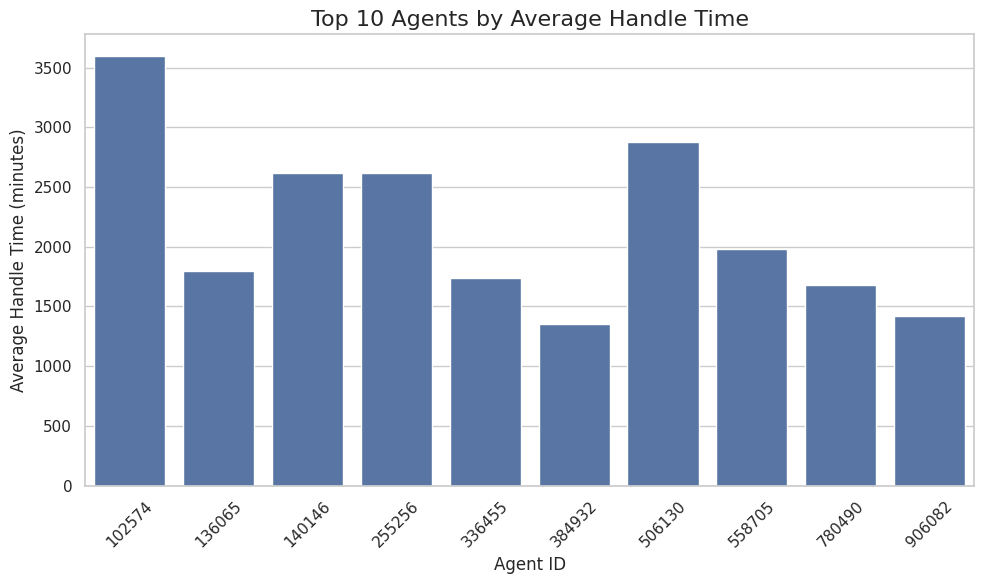

In [26]:
# Select the top 10 agents
top_10_agents = agent_performance.head(10)

# Create a bar plot for the top 10 agents
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_agents.index, y=top_10_agents.values, legend=False)

plt.title('Top 10 Agents by Average Handle Time', fontsize=16)
plt.xlabel('Agent ID', fontsize=12)
plt.ylabel('Average Handle Time (minutes)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
# Find patterns in call_start_datetime to determine peak hours when AST is longer, and agents are overloaded.
# Insight: During peak hours, increasing the number of agents or improving IVR routing could reduce AST.

df['hour_of_day'] = df['call_start_datetime'].dt.hour
peak_hours = df.groupby('hour_of_day')['waiting_time'].mean().sort_values(ascending=False)
peak_hours

,waiting_time
hour_of_day,
7,450.259901
19,446.270270
3,440.823199
8,440.781220
21,439.638336
12,438.881356
0,438.831735
9,438.616801
5,438.423913


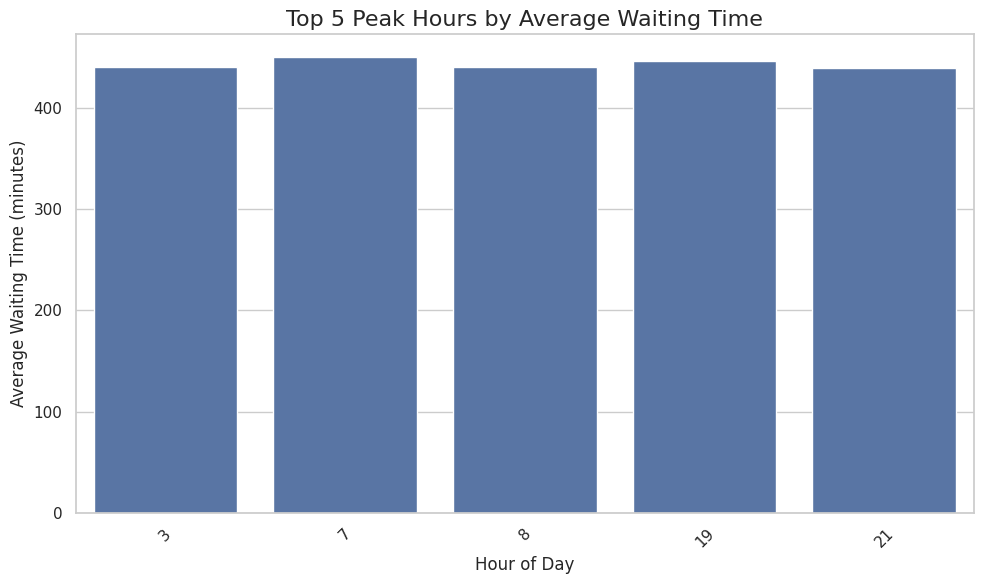

In [30]:
# Select the top 5 peak hours
top_5_peak_hours = peak_hours.head(5)

# Create a bar plot for the top 5 peak hours
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_peak_hours.index, y=top_5_peak_hours.values)

plt.title('Top 5 Peak Hours by Average Waiting Time', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Waiting Time (minutes)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [32]:
sentiment_df = pd.read_csv('/content/sentiment_statistics.csv')

In [33]:
sentiment_df.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [35]:
merged_sentiment_df = pd.merge(merged_df, sentiment_df, on='call_id', how='left')
merged_sentiment_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,waiting_time,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary_Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,Irrops,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,721730,neutral,polite,-0.05,0.35


In [39]:
merged_sentiment_df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id_x,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
handle_time,0
waiting_time,0
primary_call_reason,5157


In [41]:
merged_sentiment_df.dropna(subset=['primary_call_reason'], inplace=True)
merged_sentiment_df.dropna(subset=['agent_tone'], inplace=True)

In [43]:
mean_value = merged_sentiment_df['average_sentiment'].mean()
merged_sentiment_df['average_sentiment'].fillna(mean_value, inplace=True)

<ipython-input-43-876b8870dd20>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_sentiment_df['average_sentiment'].fillna(mean_value, inplace=True)


In [44]:
merged_sentiment_df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id_x,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
handle_time,0
waiting_time,0
primary_call_reason,0


In [45]:
merged_sentiment_df['agent_tone'].unique()

array(['neutral', 'calm', 'frustrated', 'angry', 'polite'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
agent_tone_encoder = LabelEncoder()
customer_tone_encoder = LabelEncoder()

# Fit and transform the 'agent_tone' and 'customer_tone' columns
merged_sentiment_df['agent_tone'] = agent_tone_encoder.fit_transform(merged_sentiment_df['agent_tone'])
merged_sentiment_df['customer_tone'] = customer_tone_encoder.fit_transform(merged_sentiment_df['customer_tone'])

# Display the updated DataFrame
merged_sentiment_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,waiting_time,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary_Cancel,963118,3,0,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,519057,1,3,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,Irrops,158319,3,4,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,488324,3,2,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,721730,3,4,-0.05,0.35


In [53]:
# Use average_sentiment, customer_tone, and agent_tone to analyze the correlation between call sentiment and AHT.
# Insight: Calls with negative sentiment may be taking longer due to escalations or difficult conversations. Offering additional resources for these calls can reduce AHT.

sentiment_aht = merged_sentiment_df.groupby('average_sentiment')['handle_time'].mean()
customer_tone_aht = merged_sentiment_df.groupby('customer_tone')['handle_time'].mean()
agent_tone_aht = merged_sentiment_df.groupby('agent_tone')['handle_time'].mean()

In [50]:
sentiment_aht.head()

,handle_time
average_sentiment,
-0.94,360.0
-0.90,0.0
-0.89,30.0
-0.88,360.0
-0.86,140.0


In [51]:
customer_tone_aht

,handle_time
customer_tone,
0,695.252760
1,702.728921
2,693.214042
3,707.116564
4,693.224478


In [52]:
agent_tone_aht

,handle_time
agent_tone,
0,389.016393
1,627.314920
2,619.930192
3,749.863939
4,222.962963


# Identifying granular reasons associated to recurring problems that could be resolved via self-service options in the IVR system

In [54]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [56]:
# Preprocessing function: Clean transcript data (remove stop words, special characters)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [76]:
# Additional irrelevant words to remove
# Additionally, we can enrich the stop words list by incorporating domain-specific terms to enhance the model's accuracy.

custom_stop_words = {
    'agent', 'customer', 'change', 'flight', 'fee', 'help', 'im', 'date', 'need', 'call', 'thank', 'you', 'i', 'the', 'that',
    'is', 'it', 'for', 'this', 'and', 'of', 'to', 'my', 'in', 'day', 'work', 'check', 'thanks', 'united', 'pm', 'really',
    'a', 'me', 'on', 'about', 'have', 'so', 'at', 'please', 'typing',
    'we', 'your', 'all', 'what', 'but', 'or', 'there', 'said',
    'let', 'us', 'just', 'from', 'by', 'as', 'can', 'if',
    'this', 'here', 'going', 'now', 'get', 'would', 'like',
    'one', 'two', 'three', 'four', 'five', 'first', 'next',
}

# Preprocessing function: Clean transcript data (remove stop words, special characters)
def preprocess_text(text):

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text.lower())

    stop_words = set(stopwords.words('english')).union(custom_stop_words)

    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [65]:
# Apply preprocessing to transcripts
merged_df['cleaned_transcript'] = merged_df['call_transcript'].apply(preprocess_text)

In [67]:
# Frequency analysis: Find most common phrases in transcripts using CountVectorizer
vectorizer = CountVectorizer(max_features=20, stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(merged_df['cleaned_transcript'])

In [68]:
# Get common phrases
common_phrases = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

In [69]:
# Display common phrases with their frequencies
common_phrase_df = pd.DataFrame({'phrase': common_phrases, 'frequency': frequencies}).sort_values(by='frequency', ascending=False)
print("Most Common Phrases in Transcripts:")
print(common_phrase_df)

Most Common Phrases in Transcripts:
         phrase  frequency
2       calling     148493
10         okay     128394
19        youre     119307
18         yeah     114152
12       really     111299
14         time     110856
5          know     110359
3       chicago     106723
7         looks     104391
15        today      99353
6          look      99300
13  reservation      90760
8          make      89412
16       travel      87621
4          good      87124
1        booked      85919
9           new      83836
0      airlines      82853
17   understand      77455
11      problem      74396


In [70]:
# Identify common issues that could be resolved by IVR (based on call reasons and frequent phrases)
ivr_suitable_reasons = ['Booking', 'Baggage', 'Check_In']

In [71]:
# Filter out calls that match these reasons
self_solvable_issues = merged_df[merged_df['primary_call_reason'].isin(ivr_suitable_reasons)]

In [73]:
# Display common self-solvable issues
print("\nIssues Suitable for IVR Self-service:")
self_solvable_issues[['call_id', 'primary_call_reason', 'cleaned_transcript']].head()


Issues Suitable for IVR Self-service:


,call_id,primary_call_reason,cleaned_transcript
1,1122072124,Booking,calling airlines name sam today hi sam yeah ca...
15,3313876732,Check_In,calling airlines service name sam today yeah f...
19,5889442998,Check_In,calling airlines name steve today hi steve yea...
25,8627682007,Check_In,calling airlines name john may today hi john y...
53,9983959358,Check_In,calling airlines name john may today hi umm ye...


In [74]:
# Topic Modeling with LDA to identify recurring themes in transcripts
tfidf_vectorizer = CountVectorizer(stop_words='english', max_features=500)
X_tfidf = tfidf_vectorizer.fit_transform(merged_df['cleaned_transcript'])

In [75]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [77]:
# Display LDA topics
terms = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{idx}:")
    print([terms[i] for i in topic.argsort()[:-11:-1]])


Topic #0:
['conversation', 'know', 'natural', 'make', 'tried', 'duration', 'modify', 'details', 'expand', 'pauses']

Topic #1:
['calling', 'okay', 'youre', 'reservation', 'new', 'problem', 'really', 'ahead', 'yeah', 'booked']

Topic #2:
['san', 'francisco', 'calling', 'time', 'okay', 'seat', 'look', 'know', 'chicago', 'youre']

Topic #3:
['delay', 'travel', 'understand', 'really', 'today', 'make', 'sir', 'voucher', 'frustration', 'calling']

Topic #4:
['time', 'chicago', 'calling', 'okay', 'earlier', 'la', 'yeah', 'looks', 'youre', 'booked']


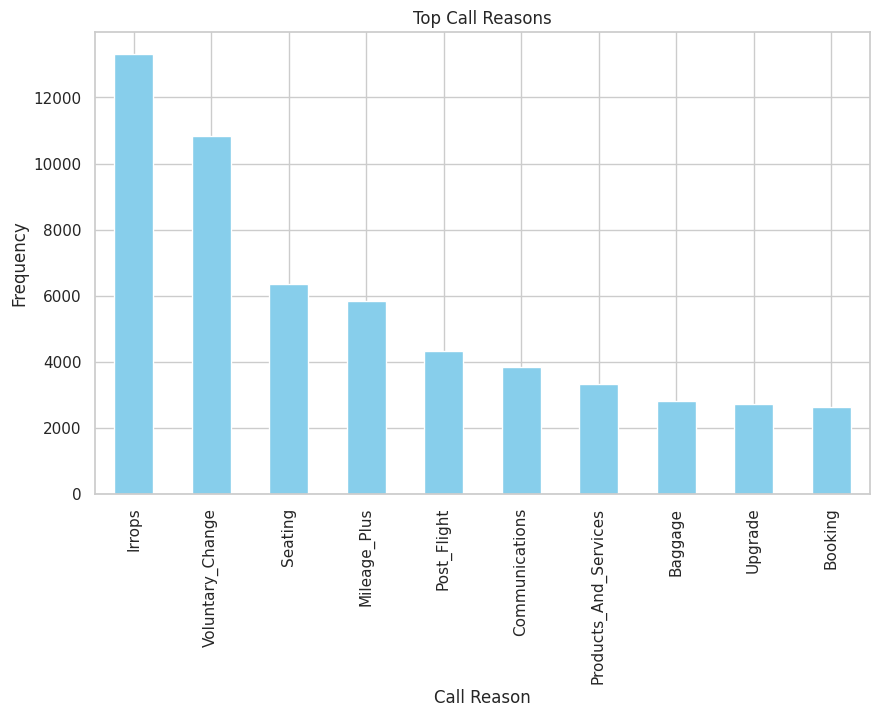

In [78]:
import matplotlib.pyplot as plt

# Bar chart for top call reasons
top_reasons = merged_df['primary_call_reason'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_reasons.plot(kind='bar', color='skyblue')
plt.title('Top Call Reasons')
plt.xlabel('Call Reason')
plt.ylabel('Frequency')
plt.show()

**Proposed Improvements to the IVR System**

1. **Enhanced Self-Service Options:**
   - *Recommendation*: Expand the range of self-service options available in the IVR, allowing customers to resolve common issues like flight status, cancellations, and baggage inquiries without needing to speak to an agent.
   - *Reasoning*: Many customers prefer quick solutions and will appreciate the ability to self-resolve simple issues, reducing call volume for agents.
2.  **Dynamic FAQs:**
   - *Recommendation*: Implement a dynamic FAQ section that updates based on frequently asked questions and recent trends, allowing customers to access relevant information during their calls.
   - *Reasoning*: Providing timely information can empower customers to find answers on their own, decreasing unnecessary calls.

3. **Personalized Call Paths:**
   - *Recommendation*: Use customer data to personalize the IVR experience, directing customers to the most relevant options based on their previous interactions or loyalty status.
   - *Reasoning*: Personalization can streamline the experience, leading to faster resolutions and reducing the need for agent assistance.

4. **Intelligent Call Routing:**
  - Implement a more sophisticated call routing mechanism that directs customers to the self-service options for their specific concerns. If a caller mentions common keywords (e.g., “flight delay,” “baggage,” or “refund”), the system should provide automated solutions instead of connecting them to an agent.

5. **Integration with Chatbots:**
   - *Recommendation*: Integrate the IVR system with AI-powered chatbots that can assist customers with text-based inquiries in parallel with voice interactions.
   - *Reasoning*: Providing multiple channels for support can accommodate different customer preferences and further reduce the load on human agents.

# Analyzing the dataset to uncover patterns that can assist in understanding and identifying these primary call reasons

In [80]:
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
import logging

In [82]:
# Step 0: Enable Gensim logging to show epoch details
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Step 1: Prepare the data for Doc2Vec
documents = [TaggedDocument(words=transcript.split(), tags=[str(i)]) for i, transcript in enumerate(merged_df['cleaned_transcript'])]

# Step 2: Train Doc2Vec model with progress reporting using epochs
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(documents)

# Training with output of progress after every 1000 documents - Using epochs for progress tracking
for epoch in range(model.epochs):
    model.train(documents, total_examples=model.corpus_count, epochs=1, start_alpha=0.01, end_alpha=0.001)
    print(f"Epoch {epoch + 1} of 40 completed.")

# Step 3: Create feature vectors for training
def get_vector(transcript):
    return model.infer_vector(transcript.split())

# Step 4: Create feature vectors for all transcripts
X = merged_df['cleaned_transcript'].apply(get_vector).tolist()
y = merged_df['primary_call_reason']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1 of 40 completed.


Epoch 2 of 40 completed.


Epoch 3 of 40 completed.


Epoch 4 of 40 completed.


Epoch 5 of 40 completed.


Epoch 6 of 40 completed.


Epoch 7 of 40 completed.


Epoch 8 of 40 completed.


Epoch 9 of 40 completed.


Epoch 10 of 40 completed.


Epoch 11 of 40 completed.


Epoch 12 of 40 completed.


Epoch 13 of 40 completed.


Epoch 14 of 40 completed.


Epoch 15 of 40 completed.


Epoch 16 of 40 completed.


Epoch 17 of 40 completed.


Epoch 18 of 40 completed.


Epoch 19 of 40 completed.


Epoch 20 of 40 completed.


Epoch 21 of 40 completed.


Epoch 22 of 40 completed.


Epoch 23 of 40 completed.


Epoch 24 of 40 completed.


Epoch 25 of 40 completed.


Epoch 26 of 40 completed.


Epoch 27 of 40 completed.


Epoch 28 of 40 completed.


Epoch 29 of 40 completed.


Epoch 30 of 40 completed.


Epoch 31 of 40 completed.


Epoch 32 of 40 completed.


Epoch 33 of 40 completed.


Epoch 34 of 40 completed.


Epoch 35 of 40 completed.


Epoch 36 of 40 completed.


Epoch 37 of 40 completed.


Epoch 38 of 40 completed.


Epoch 39 of 40 completed.
Epoch 40 of 40 completed.


In [83]:
# Step 5: Train Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Step 6: Evaluate the model
y_pred = classifier.predict(X_test)
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[   0,    0,    0,    0,    1,    0,    0,    0,  406,    7,    0,
           1,    0,    0,   13,    0,    0,    0,    0,  176],
       [   0,    0,    0,    0,    0,    0,    0,    0,  361,    7,    0,
           1,    0,    0,    3,    0,    0,    0,    0,  141],
       [   0,    0,    0,    0,    0,    0,    0,    0,  240,    3,    0,
           0,    0,    0,   10,    0,    0,    0,    0,  106],
       [   0,    0,    0,    0,    1,    0,    0,    0,  268,    6,    0,
           0,    0,    0,    8,    0,    0,    0,    0,  101],
       [   0,    0,    0,    0,    0,    0,    0,    0,  539,    4,    0,
           0,    0,    0,   13,    0,    0,    0,    0,  201],
       [   0,    0,    0,    0,    0,    0,    0,    0,  178,    3,    0,
           0,    0,    0,    3,    0,    0,    0,    0,   71],
       [   0,    0,    0,    0,    0,    0,    0,    0,   54,    3,    0,
           0,    0,    0,    2,    0,    0,    0,    0,   27],
       [   0,    0,    0,    0,    0,    

In [85]:
print("\nClassification Report:")
classification_report(y_test, y_pred)


Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                       precision    recall  f1-score   support\n\n              Baggage       0.00      0.00      0.00       604\n              Booking       0.00      0.00      0.00       513\n             Check_In       0.00      0.00      0.00       359\n             Checkout       0.00      0.00      0.00       384\n       Communications       0.00      0.00      0.00       757\n      Digital_Support       0.00      0.00      0.00       255\n           Disability       0.00      0.00      0.00        86\n                  Etc       0.00      0.00      0.00       197\n               Irrops       0.21      0.71      0.33      2763\n         Mileage_Plus       0.11      0.01      0.02      1130\n         Other_Topics       0.00      0.00      0.00       174\n          Post_Flight       0.00      0.00      0.00       848\nProducts_And_Services       0.00      0.00      0.00       658\n      Schedule_Change       0.00      0.00      0.00       146\n              Seating       0.09     

In [87]:
# Step 1: Load the test.csv
test_df = pd.read_csv('/content/test.csv')

# Step 2: Merge the test_df with the calls_df based on 'call_id' to get the transcripts
test_merged_df = pd.merge(test_df, df, on='call_id', how='left')

In [88]:
test_merged_df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
handle_time,0
waiting_time,0
hour_of_day,0


In [93]:
# Step 3: Preprocess the transcripts in the test data
test_merged_df['cleaned_transcript'] = test_merged_df['call_transcript'].apply(preprocess_text)

# Step 4: Use the trained pipeline to predict the primary call reason
X = test_merged_df['cleaned_transcript'].apply(get_vector).tolist()
test_predictions = classifier.predict(X)

# Step 5: Save the predictions in the test.csv format with 'call_id' and 'primary_call_reason'
test_merged_df['primary_call_reason'] = test_predictions
test_merged_df[['call_id', 'primary_call_reason']].to_csv('test_predictions.csv', index=False)

In [94]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [95]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>